In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
df.drop(columns='User_ID', inplace=True)

In [4]:
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 46.2+ MB


In [7]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [8]:
df['Gender'].replace(['F','M'],[0,1], inplace=True)

In [9]:
df['City_Category'].replace(['A', 'B', 'C'], [0,1,2], inplace=True)

In [10]:
df['Age']=df['Age'].map({'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6})

In [11]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].map({'0':0, '1':1, '2':2, '3':3, '4+':4})

In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422
3,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057
4,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969


In [13]:
df['Occupation'].nunique()

21

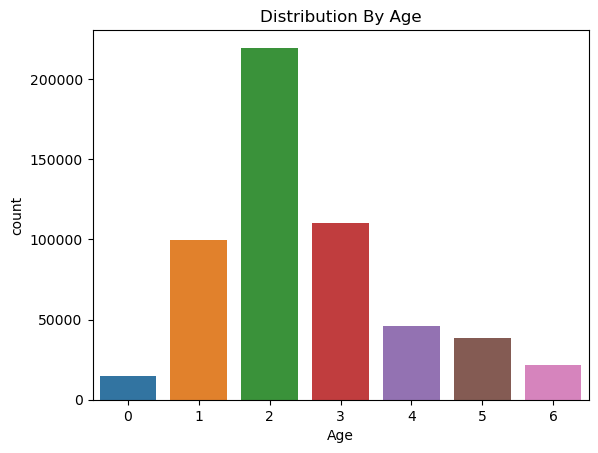

In [26]:
sns.countplot( x=df['Age'])
plt.title('Distribution By Age');

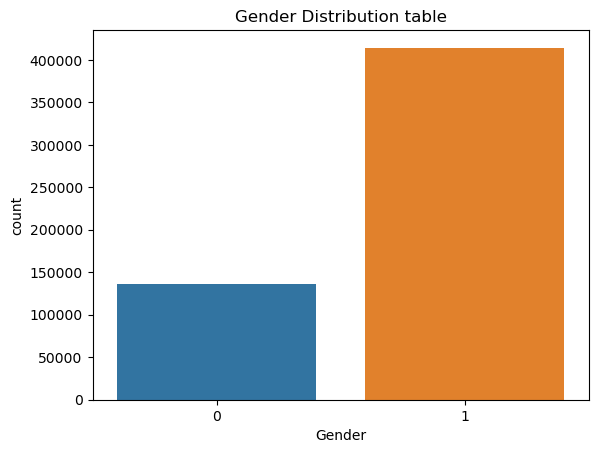

In [15]:
sns.countplot(x=df['Gender'])
plt.title('Gender Distribution table');

C:\Users\letei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


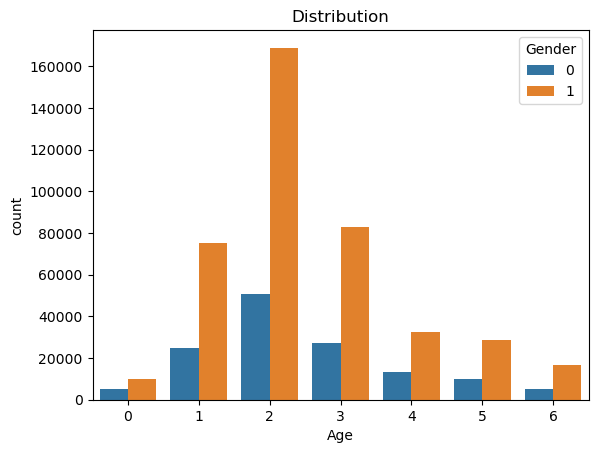

In [40]:
sns.countplot(df["Age"],hue=df["Gender"])
plt.title('Distribution');

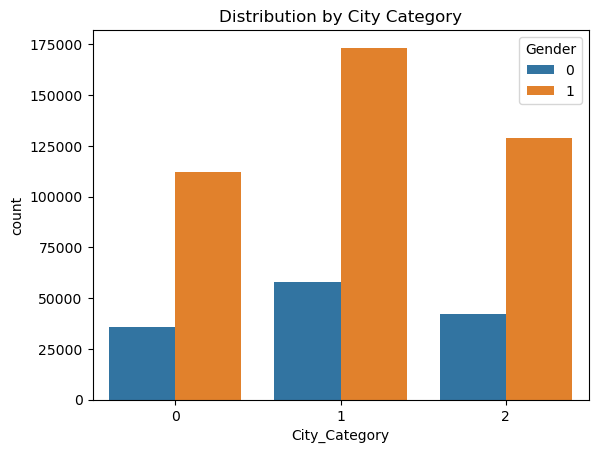

In [41]:
sns.countplot(x=df['City_Category'], hue=df['Gender'])
plt.title('Distribution by City Category');

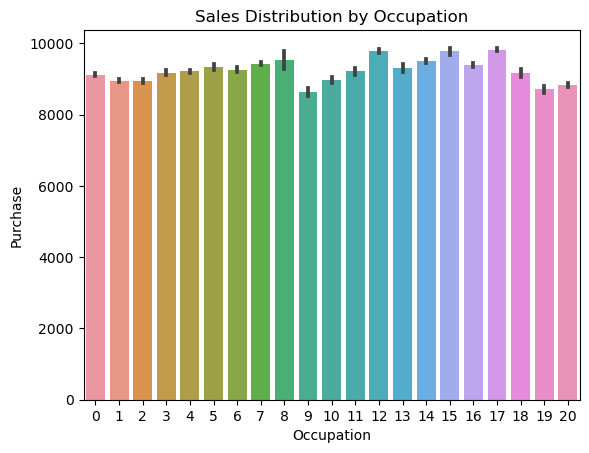

In [43]:
sns.barplot(data=df, x=df['Occupation'], y=df['Purchase'])
plt.title('Sales Distribution by Occupation');

Text(0.5, 1.0, 'sales Distibution by Age')

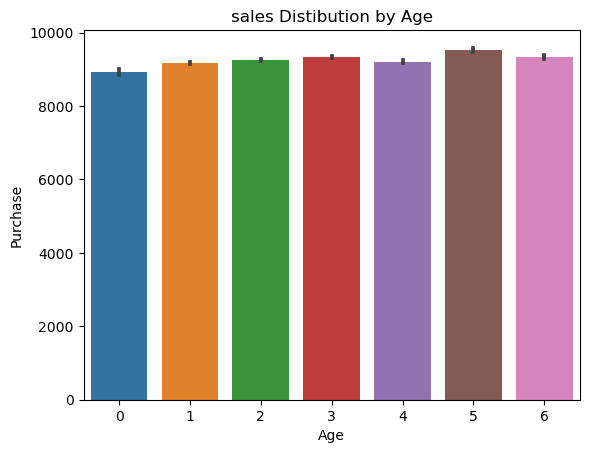

In [29]:
sns.barplot(data=df, x=df['Age'], y=df['Purchase'])
plt.title('sales Distibution by Age')

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

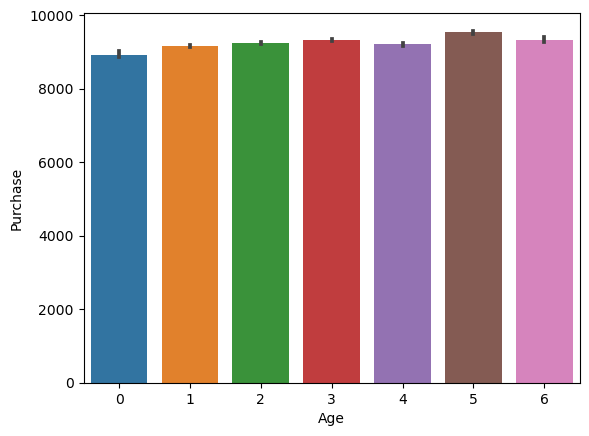

In [25]:
sns.barplot(data=df, x=df['Age'], y=df['Purchase'])

Text(0.5, 1.0, 'Sales Distribution by Product category 1')

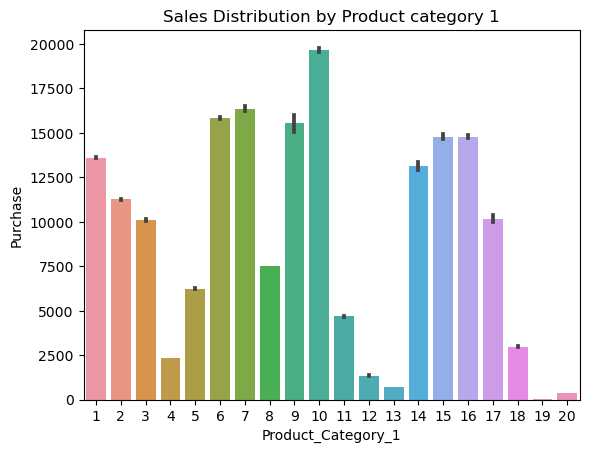

In [31]:
sns.barplot(data=df, x=df['Product_Category_1'], y=df['Purchase'])
plt.title('Sales Distribution by Product category 1')

Text(0.5, 1.0, 'Sales Distribution by Product category 2')

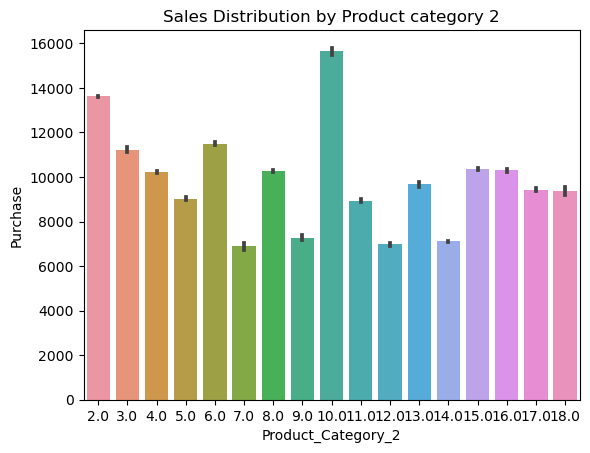

In [32]:
sns.barplot(data=df, x=df['Product_Category_2'], y=df['Purchase'])
plt.title('Sales Distribution by Product category 2')

Text(0.5, 1.0, 'Sales Distribution by Product category 3')

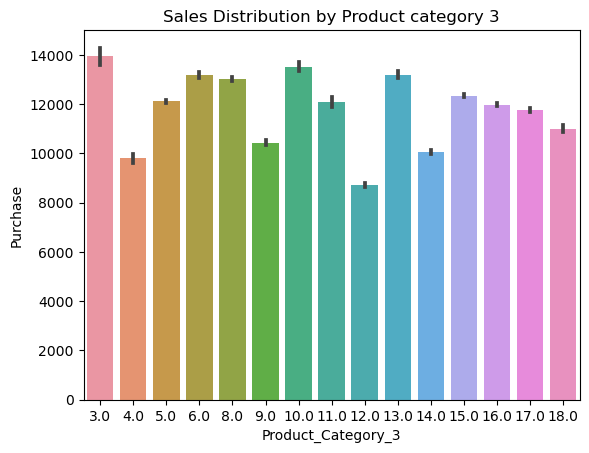

In [33]:
sns.barplot(data=df, x=df['Product_Category_3'], y=df['Purchase'])
plt.title('Sales Distribution by Product category 3')

Text(0.5, 1.0, 'Sales Distribution by City Category')

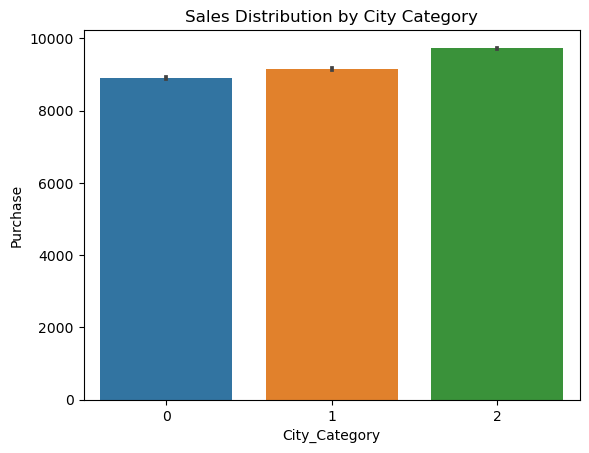

In [39]:
sns.barplot(data=df, x=df['City_Category'], y=df['Purchase'])
plt.title('Sales Distribution by City Category')

Text(0.5, 1.0, 'Sales Distribution by Gender')

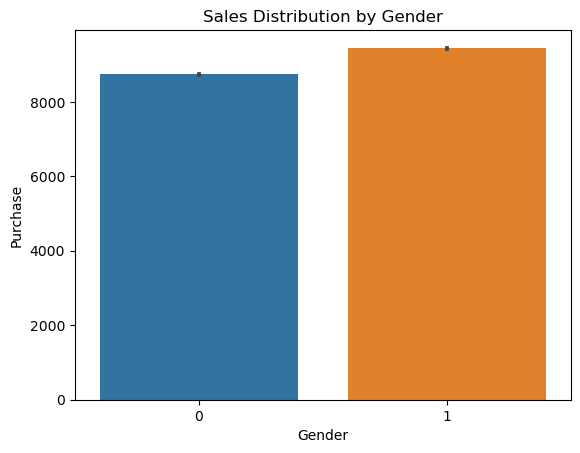

In [38]:
sns.barplot(data=df, x=df['Gender'], y=df['Purchase'])
plt.title('Sales Distribution by Gender')

In [44]:
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422
3,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057
4,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969


In [45]:
df['Product_ID'].nunique()

3631

In [ ]:
sns.histplot(data=df, x=df['Age'], hue=df['Purchase'], multiple='stack')